# RNA velocity analysis

09/12/2020.

We compute the RNA velocities for each batch separately, but we project the results on UMAPs computed per experiment:

1. Experiment 1: SIGAA2 (IVF), SIGAB2 (NT)

2. Experiment 2: SIGAH5 (IVF), SIGAH12 (NT)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scvelo as scv

In [3]:
print(scv.__version__)
print(sc.__version__)
print(ad.__version__)

0.2.2
1.6.0
0.7.4


In [4]:
# Load the files with metadata informations
rnavelo_folder='/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/Data_analysis/RNA_VELOCITY/'

cluster_labels_exp1=pd.read_csv(rnavelo_folder+'exp1_labels.csv',index_col=0,dtype=str)
cluster_labels_exp2=pd.read_csv(rnavelo_folder+'exp2_labels.csv',index_col=0,dtype=str)

cluster_labels_exp1.index=cluster_labels_exp1.index.str.replace('.1','')
cluster_labels_exp2.index=cluster_labels_exp2.index.str.replace('.1','')

# Load the first 2 UMAP components (UMAPs computed per experiment)
umap_exp1=pd.read_csv(rnavelo_folder+'exp1_umap.csv',index_col=0)
umap_exp2=pd.read_csv(rnavelo_folder+'exp2_umap.csv',index_col=0)

# Load the first 2 UMAP components (original UMAP used for clustering)
umap_tot=pd.read_csv(rnavelo_folder+'full_umap.csv',index_col=0)

umap_exp1.index=umap_exp1.index.str.replace('.1', '')
umap_exp2.index=umap_exp2.index.str.replace('.1', '')

umap_tot.index=umap_tot.index.str.replace('.1', '')

cell_names_SIGAA2=np.loadtxt(rnavelo_folder+'SIGAA2_cell_names.txt',dtype=str)
cell_names_SIGAB2=np.loadtxt(rnavelo_folder+'SIGAB2_cell_names.txt',dtype=str)
cell_names_SIGAH5=np.loadtxt(rnavelo_folder+'SIGAH5_cell_names.txt',dtype=str)
cell_names_SIGAH12=np.loadtxt(rnavelo_folder+'SIGAH12_cell_names.txt',dtype=str)

cell_names_SIGAA2=[s.replace('.1', '') for s in list(cell_names_SIGAA2)]
cell_names_SIGAB2=[s.replace('.1', '') for s in list(cell_names_SIGAB2)]
cell_names_SIGAH5=[s.replace('.1', '') for s in list(cell_names_SIGAH5)]
cell_names_SIGAH12=[s.replace('.1', '') for s in list(cell_names_SIGAH12)]

my_color_palette=np.loadtxt(rnavelo_folder+'cluster_colors.txt',dtype=str,comments='/')

In [5]:
print(len(cell_names_SIGAA2),len(set(cell_names_SIGAA2)))
print(len(cell_names_SIGAB2),len(set(cell_names_SIGAB2)))
print(len(cell_names_SIGAH5),len(set(cell_names_SIGAH5)))
print(len(cell_names_SIGAH12),len(set(cell_names_SIGAH12)))

559 559
495 495
1267 1267
1043 1043


In [6]:
# Load Chris' loom files
loom_folder='/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/Loom_Chris/'

adata_SIGAA2=scv.read(loom_folder+'SIGAA2_91_Chm3_FC2r.loom', sparse=True,cache=True)
adata_SIGAB2=scv.read(loom_folder+'SIGAB2_91_Chm3_FC2r.loom', sparse=True,cache=True)
adata_SIGAH5=scv.read(loom_folder+'SIGAH5_91_Chm3_FC2.loom', sparse=True,cache=True)
adata_SIGAH12=scv.read(loom_folder+'SIGAH12_91_Chm3_FC2.loom', sparse=True,cache=True)

adata_SIGAA2.var_names_make_unique()
adata_SIGAB2.var_names_make_unique()
adata_SIGAH5.var_names_make_unique()
adata_SIGAH12.var_names_make_unique()

adata_SIGAA2.obs.index=adata_SIGAA2.obs.index.str.replace('SIGAA2_91_Chm3_FC2r:', '')
adata_SIGAA2.obs.index=adata_SIGAA2.obs.index.str.replace('x', '')

adata_SIGAB2.obs.index=adata_SIGAB2.obs.index.str.replace('SIGAB2_91_Chm3_FC2r:', '')
adata_SIGAB2.obs.index=adata_SIGAB2.obs.index.str.replace('x', '')

adata_SIGAH5.obs.index=adata_SIGAH5.obs.index.str.replace('SIGAH5_91_Chm3_FC2:', '')
adata_SIGAH5.obs.index=adata_SIGAH5.obs.index.str.replace('x', '')

adata_SIGAH12.obs.index=adata_SIGAH12.obs.index.str.replace('SIGAH12_91_Chm3_FC2:', '')
adata_SIGAH12.obs.index=adata_SIGAH12.obs.index.str.replace('x', '')

# We eliminated cells from cluster 10 and outlier cells from cluster 6 from our dataset,
# so we eliminate them accordingly also from the matrices provided by Chris
adata_SIGAA2=adata_SIGAA2[cell_names_SIGAA2,:]
adata_SIGAB2=adata_SIGAB2[cell_names_SIGAB2,:]
adata_SIGAH5=adata_SIGAH5[cell_names_SIGAH5,:]
adata_SIGAH12=adata_SIGAH12[cell_names_SIGAH12,:]

# Assign umap coordinates and cluster labels to each batch

# UMAP per experiment
umap_SIGAA2=umap_exp1.loc[cell_names_SIGAA2,:]
umap_SIGAB2=umap_exp1.loc[cell_names_SIGAB2,:]
umap_SIGAH5=umap_exp2.loc[cell_names_SIGAH5,:]
umap_SIGAH12=umap_exp2.loc[cell_names_SIGAH12,:]

# Original UMAP
umap_SIGAA2_tot=umap_tot.loc[cell_names_SIGAA2,:]
umap_SIGAB2_tot=umap_tot.loc[cell_names_SIGAB2,:]
umap_SIGAH5_tot=umap_tot.loc[cell_names_SIGAH5,:]
umap_SIGAH12_tot=umap_tot.loc[cell_names_SIGAH12,:]

cluster_labels_SIGAA2=cluster_labels_exp1.loc[cell_names_SIGAA2,:]
cluster_labels_SIGAB2=cluster_labels_exp1.loc[cell_names_SIGAB2,:]
cluster_labels_SIGAH5=cluster_labels_exp2.loc[cell_names_SIGAH5,:]
cluster_labels_SIGAH12=cluster_labels_exp2.loc[cell_names_SIGAH12,:]



# Check the order of the cells, assign UMAP coordinates and cluster labels

# UMAP per experiment
umap_SIGAA2=umap_SIGAA2.reindex(adata_SIGAA2.obs_names)
umap_SIGAB2=umap_SIGAB2.reindex(adata_SIGAB2.obs_names)
umap_SIGAH5=umap_SIGAH5.reindex(adata_SIGAH5.obs_names)
umap_SIGAH12=umap_SIGAH12.reindex(adata_SIGAH12.obs_names)

# Original UMAP
umap_SIGAA2_tot=umap_SIGAA2_tot.reindex(adata_SIGAA2.obs_names)
umap_SIGAB2_tot=umap_SIGAB2_tot.reindex(adata_SIGAB2.obs_names)
umap_SIGAH5_tot=umap_SIGAH5_tot.reindex(adata_SIGAH5.obs_names)
umap_SIGAH12_tot=umap_SIGAH12_tot.reindex(adata_SIGAH12.obs_names)

cluster_labels_SIGAA2=cluster_labels_SIGAA2.reindex(adata_SIGAA2.obs_names)
cluster_labels_SIGAB2=cluster_labels_SIGAB2.reindex(adata_SIGAB2.obs_names)
cluster_labels_SIGAH5=cluster_labels_SIGAH5.reindex(adata_SIGAH5.obs_names)
cluster_labels_SIGAH12=cluster_labels_SIGAH12.reindex(adata_SIGAH12.obs_names)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
# Check order of the cells
print('UMAP per exp coords')
print(list(adata_SIGAA2.obs_names) == list(umap_SIGAA2.index))
print(list(adata_SIGAB2.obs_names) == list(umap_SIGAB2.index))
print(list(adata_SIGAH5.obs_names) == list(umap_SIGAH5.index))
print(list(adata_SIGAH12.obs_names) == list(umap_SIGAH12.index))

print('Original UMAP coords')
print(list(adata_SIGAA2.obs_names) == list(umap_SIGAA2_tot.index))
print(list(adata_SIGAB2.obs_names) == list(umap_SIGAB2_tot.index))
print(list(adata_SIGAH5.obs_names) == list(umap_SIGAH5_tot.index))
print(list(adata_SIGAH12.obs_names) == list(umap_SIGAH12_tot.index))

print('Cluster labels')
print(list(adata_SIGAA2.obs_names) == list(cluster_labels_SIGAA2.index))
print(list(adata_SIGAB2.obs_names) == list(cluster_labels_SIGAB2.index))
print(list(adata_SIGAH5.obs_names) == list(cluster_labels_SIGAH5.index))
print(list(adata_SIGAH12.obs_names) == list(cluster_labels_SIGAH12.index))

UMAP per exp coords
True
True
True
True
Original UMAP coords
True
True
True
True
Cluster labels
True
True
True
True


In [8]:
adata_SIGAA2.obs['seurat_clusters']=list(cluster_labels_SIGAA2['seurat_clusters'])
adata_SIGAB2.obs['seurat_clusters']=list(cluster_labels_SIGAB2['seurat_clusters'])
adata_SIGAH5.obs['seurat_clusters']=list(cluster_labels_SIGAH5['seurat_clusters'])
adata_SIGAH12.obs['seurat_clusters']=list(cluster_labels_SIGAH12['seurat_clusters'])

# UMAP per experiment stored in X_umap
adata_SIGAA2.obsm['X_umap']=np.array(umap_SIGAA2[['UMAP_1','UMAP_2']])
adata_SIGAB2.obsm['X_umap']=np.array(umap_SIGAB2[['UMAP_1','UMAP_2']])
adata_SIGAH5.obsm['X_umap']=np.array(umap_SIGAH5[['UMAP_1','UMAP_2']])
adata_SIGAH12.obsm['X_umap']=np.array(umap_SIGAH12[['UMAP_1','UMAP_2']])

# Original UMAP stored in X_diffmap
adata_SIGAA2.obsm['X_umap2']=np.array(umap_SIGAA2_tot[['UMAP_1','UMAP_2']])
adata_SIGAB2.obsm['X_umap2']=np.array(umap_SIGAB2_tot[['UMAP_1','UMAP_2']])
adata_SIGAH5.obsm['X_umap2']=np.array(umap_SIGAH5_tot[['UMAP_1','UMAP_2']])
adata_SIGAH12.obsm['X_umap2']=np.array(umap_SIGAH12_tot[['UMAP_1','UMAP_2']])

adata_SIGAA2.obs['seurat_clusters']=adata_SIGAA2.obs['seurat_clusters'].astype('category')
adata_SIGAB2.obs['seurat_clusters']=adata_SIGAB2.obs['seurat_clusters'].astype('category')
adata_SIGAH5.obs['seurat_clusters']=adata_SIGAH5.obs['seurat_clusters'].astype('category')
adata_SIGAH12.obs['seurat_clusters']=adata_SIGAH12.obs['seurat_clusters'].astype('category')

adata_SIGAA2.uns['seurat_clusters_colors']=my_color_palette
adata_SIGAB2.uns['seurat_clusters_colors']=my_color_palette
adata_SIGAH5.uns['seurat_clusters_colors']=my_color_palette
adata_SIGAH12.uns['seurat_clusters_colors']=my_color_palette

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [9]:
my_color_palette

array(['#F8766D', '#DB8E00', '#AEA200', '#64B200', '#00BD5C', '#00C1A7',
       '#00BADE', '#00A6FF', '#B385FF', '#EF67EB'], dtype='<U7')

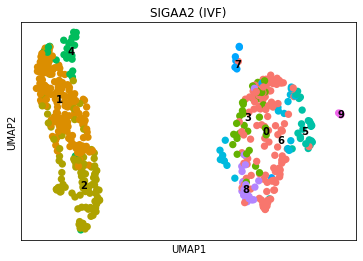

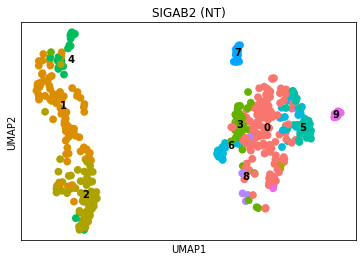

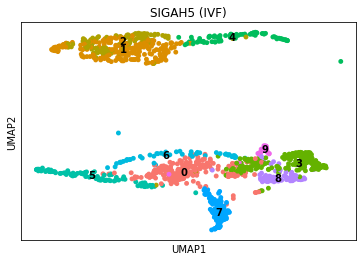

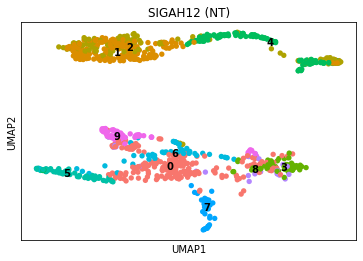

In [10]:
sc.pl.umap(adata_SIGAA2,color='seurat_clusters',title='SIGAA2 (IVF)',
           palette=list(my_color_palette),legend_loc='on data')
sc.pl.umap(adata_SIGAB2,color='seurat_clusters',title='SIGAB2 (NT)'
           ,palette=list(my_color_palette),legend_loc='on data')
sc.pl.umap(adata_SIGAH5,color='seurat_clusters',title='SIGAH5 (IVF)'
           ,palette=list(my_color_palette),legend_loc='on data')
sc.pl.umap(adata_SIGAH12,color='seurat_clusters',title='SIGAH12 (NT)',
palette=list(my_color_palette),legend_loc='on data')

In [11]:
# Define the data for inner and outer layers
outer_list=['1','2','4']
inner_list=['0','3','5','6','7','8','9']

adata_SIGAA2_outer=adata_SIGAA2.copy()
adata_SIGAA2_inner=adata_SIGAA2.copy()

adata_SIGAA2_outer = adata_SIGAA2_outer[adata_SIGAA2_outer.obs['seurat_clusters'].isin(outer_list),:]
adata_SIGAA2_inner = adata_SIGAA2_inner[adata_SIGAA2_inner.obs['seurat_clusters'].isin(inner_list),:]

adata_SIGAB2_outer=adata_SIGAB2.copy()
adata_SIGAB2_inner=adata_SIGAB2.copy()

adata_SIGAB2_outer = adata_SIGAB2_outer[adata_SIGAB2_outer.obs['seurat_clusters'].isin(outer_list),:]
adata_SIGAB2_inner = adata_SIGAB2_inner[adata_SIGAB2_inner.obs['seurat_clusters'].isin(inner_list),:]

adata_SIGAH5_outer=adata_SIGAH5.copy()
adata_SIGAH5_inner=adata_SIGAH5.copy()

adata_SIGAH5_outer = adata_SIGAH5_outer[adata_SIGAH5_outer.obs['seurat_clusters'].isin(outer_list),:]
adata_SIGAH5_inner = adata_SIGAH5_inner[adata_SIGAH5_inner.obs['seurat_clusters'].isin(inner_list),:]

adata_SIGAH12_outer=adata_SIGAH12.copy()
adata_SIGAH12_inner=adata_SIGAH12.copy()

adata_SIGAH12_outer = adata_SIGAH12_outer[adata_SIGAH12_outer.obs['seurat_clusters'].isin(outer_list),:]
adata_SIGAH12_inner = adata_SIGAH12_inner[adata_SIGAH12_inner.obs['seurat_clusters'].isin(inner_list),:]

In [12]:
def RNAVeloWrap(adata,batch,label,cond,cl_lab,dimred):
    if dimred=='per_exp_UMAP':
        my_basis='umap'
    elif dimred=='orig_UMAP':
        my_basis='umap2'
    else:
        print('Error: the chosen embedding does not exist')
        
    scv.utils.show_proportions(adata)
    scv.pp.filter_genes(adata,min_cells=10)
    scv.pp.filter_and_normalize(adata, min_counts=20, min_counts_u=10, n_top_genes=2000)
    adata.raw=adata
    scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
    scv.tl.recover_dynamics(adata)
    scv.tl.velocity(adata, mode='dynamical')
    scv.tl.velocity_graph(adata)
    scv.tl.velocity_embedding(adata, basis=my_basis) 
    scv.tl.paga(adata, groups=cl_lab)
    df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
    print('velo genes',adata.var['velocity_genes'].sum())
    scv.pl.velocity_embedding_stream(adata,basis=my_basis, legend_loc='on data',dpi=100,color=cl_lab,
                                     size=100,alpha=1,title=batch+'('+cond+')',
                                     save=dimred + '_' + batch + '_' + label + '_' + '_stream.png')
    scv.pl.velocity_embedding_grid(adata,basis=my_basis, legend_loc='on data',dpi=100,color=cl_lab,
                                   size=100,alpha=1,arrow_length=2,arrow_color='black',
                                 title=batch + '('+cond+')',
                                   save=dimred + '_' + batch + '_' + label + '_' + '_grid.pdf')
    scv.pl.paga(adata, basis=my_basis, size=50, alpha=.3,color=cl_lab,title=batch+'('+cond+')',
                min_edge_width=2, node_size_scale=1.5,legend_loc='on data',
                save=dimred + '_' + batch + '_' + label + '_' + '_PAGA.pdf')

In [14]:
# Choose on which embedding the velocities should be projected:
# per_exp_UMAP for using UMAPs computed per experiment
# orig_UMAP for using the original UMAP computed on the whole dataset
my_embedding='per_exp_UMAP'

Abundance of ['spliced', 'unspliced']: [0.91 0.09]
Filtered out 16173 genes that are detected in less than 10 cells (spliced).
Filtered out 1405 genes that are detected 20 counts (spliced).
Filtered out 3549 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:02:41) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

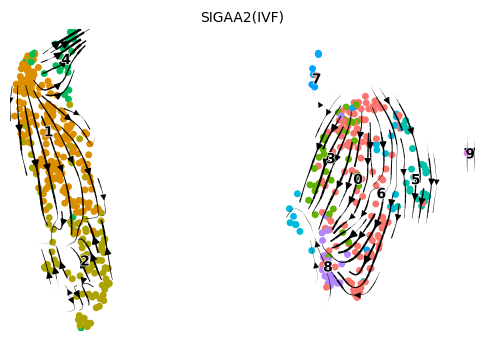

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAA2_total__grid.pdf


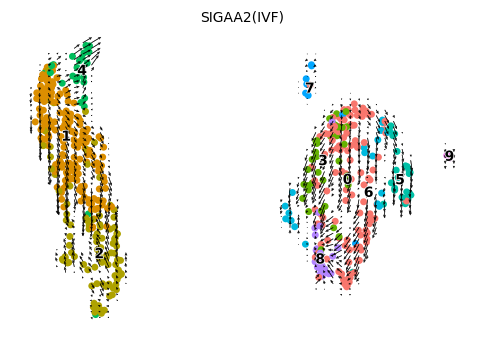

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAA2_total__PAGA.pdf


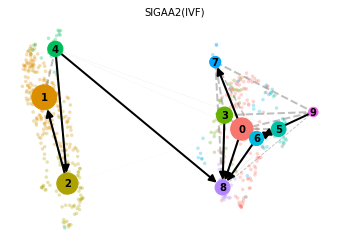

Abundance of ['spliced', 'unspliced']: [0.92 0.08]
Filtered out 16579 genes that are detected in less than 10 cells (spliced).
Filtered out 1264 genes that are detected 20 counts (spliced).
Filtered out 4102 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:02:31) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

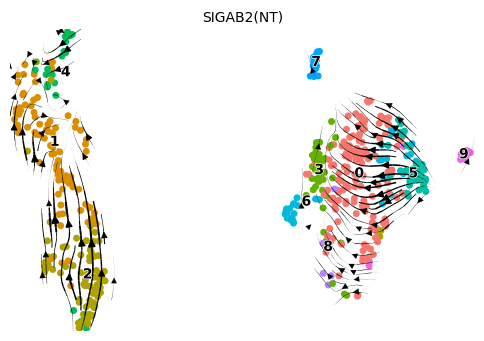

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAB2_total__grid.pdf


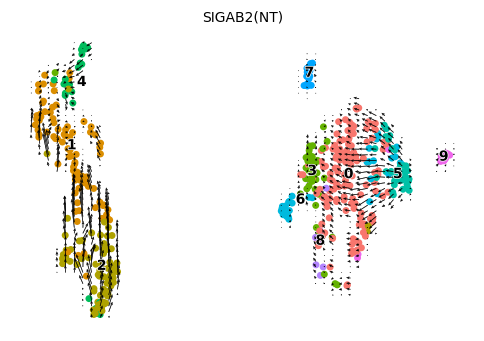

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAB2_total__PAGA.pdf


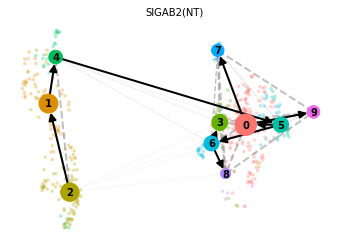

Abundance of ['spliced', 'unspliced']: [0.93 0.07]
Filtered out 14961 genes that are detected in less than 10 cells (spliced).
Filtered out 1412 genes that are detected 20 counts (spliced).
Filtered out 2927 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:05:31) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

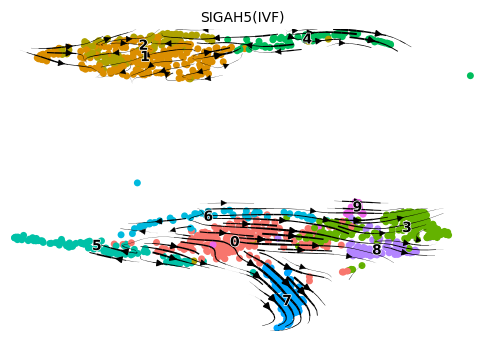

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH5_total__grid.pdf


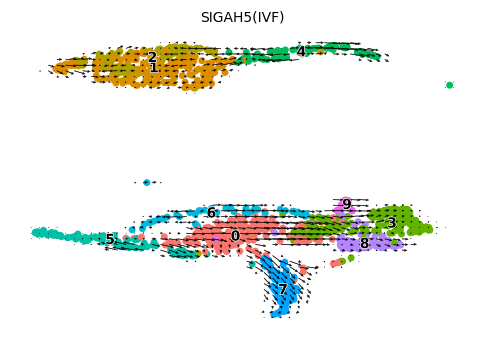

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH5_total__PAGA.pdf


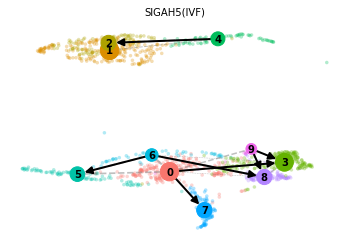

Abundance of ['spliced', 'unspliced']: [0.94 0.06]
Filtered out 15060 genes that are detected in less than 10 cells (spliced).
Filtered out 1342 genes that are detected 20 counts (spliced).
Filtered out 3286 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:04:08) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

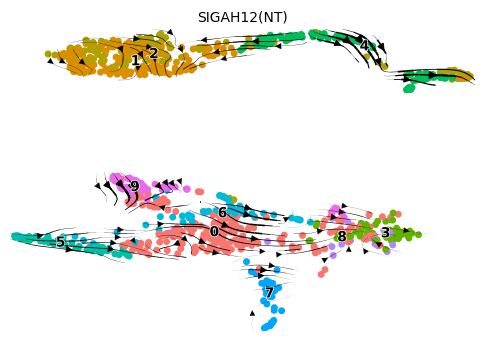

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH12_total__grid.pdf


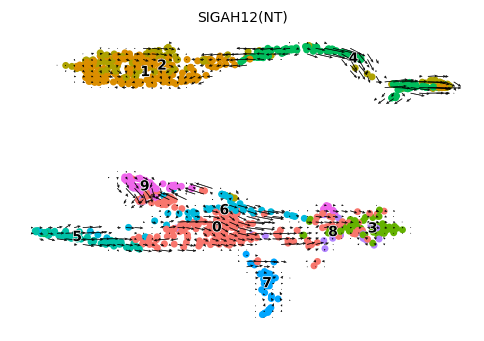

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH12_total__PAGA.pdf


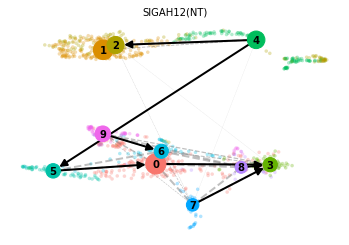

In [15]:
# Run RNA velocity analysis
RNAVeloWrap(adata_SIGAA2,batch='SIGAA2',label='total',cond='IVF',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAB2,batch='SIGAB2',label='total',cond='NT',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAH5,batch='SIGAH5',label='total',cond='IVF',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAH12,batch='SIGAH12',label='total',cond='NT',cl_lab='seurat_clusters',dimred=my_embedding)

In [15]:
top10_SIGAA2=adata_SIGAA2.var['fit_likelihood'].sort_values(ascending=False)[:10].index
top10_SIGAB2=adata_SIGAB2.var['fit_likelihood'].sort_values(ascending=False)[:10].index
top10_SIGAH5=adata_SIGAH5.var['fit_likelihood'].sort_values(ascending=False)[:10].index
top10_SIGAH12=adata_SIGAH12.var['fit_likelihood'].sort_values(ascending=False)[:10].index

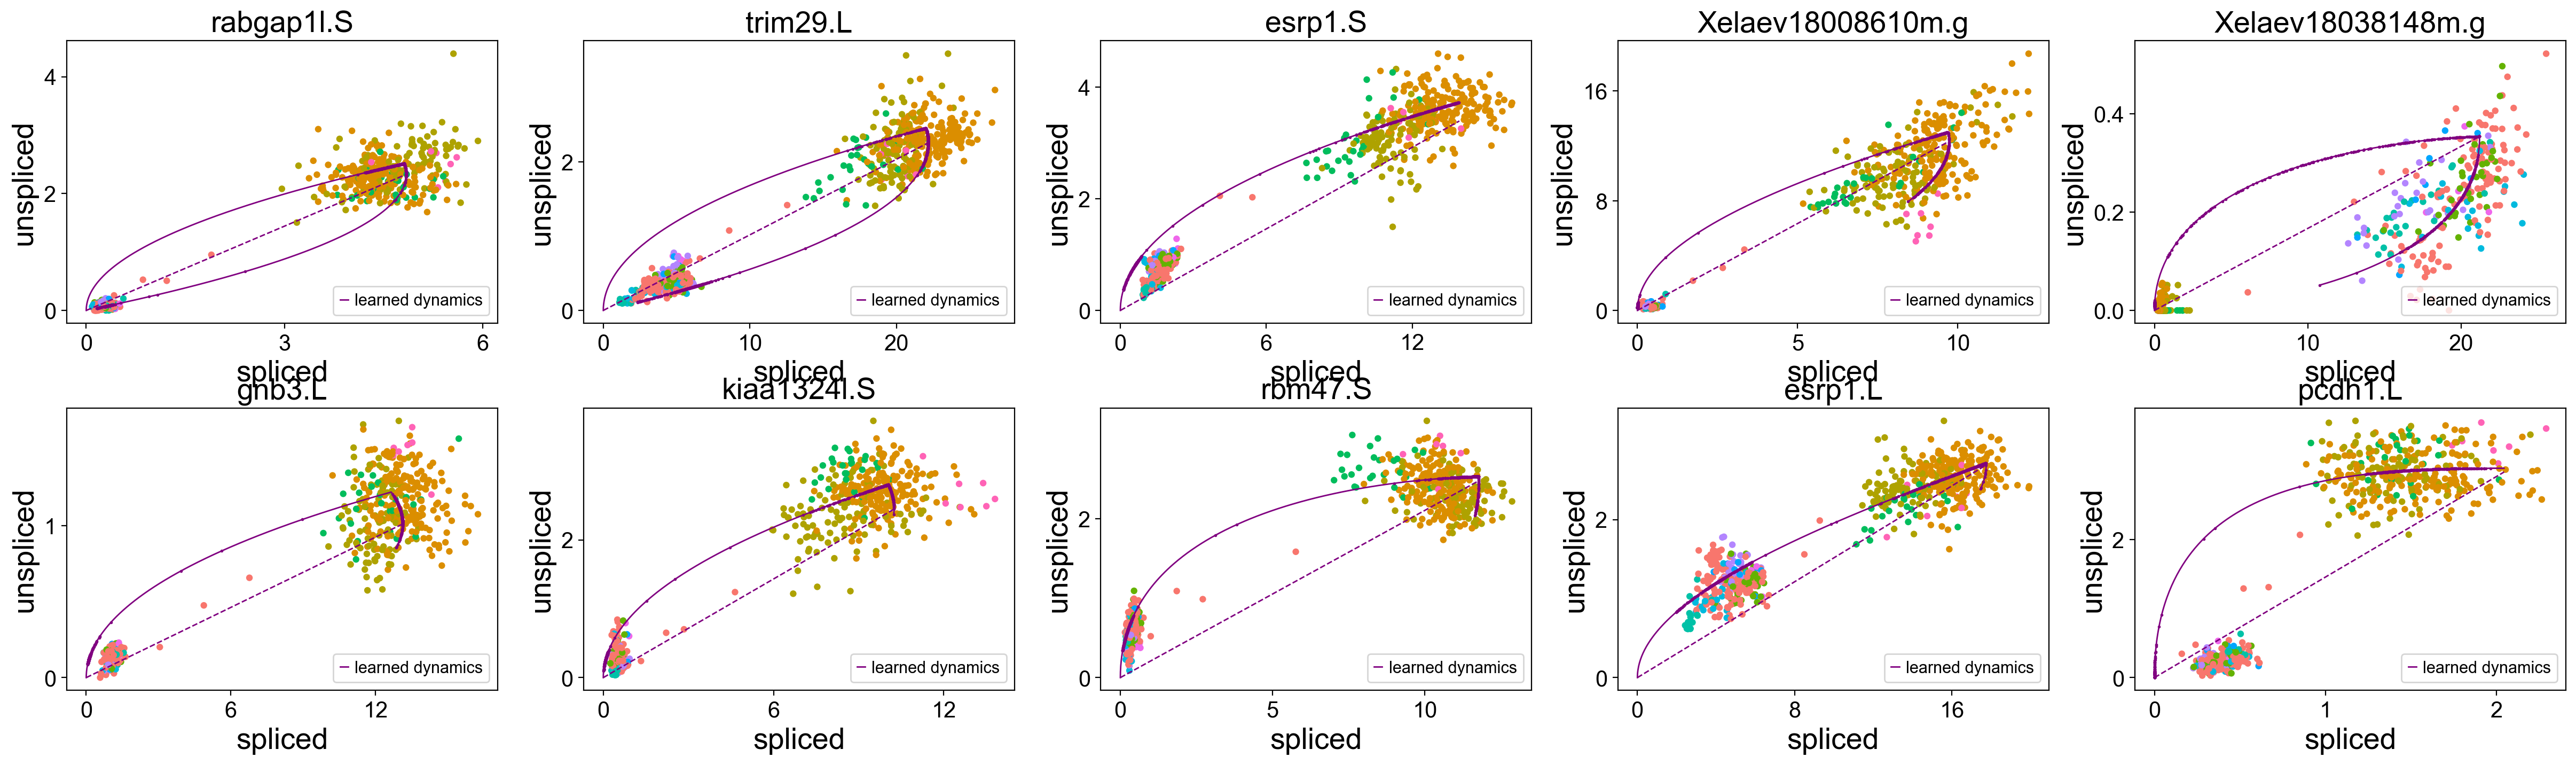

In [16]:
scv.pl.scatter(adata_SIGAA2, basis=top10_SIGAA2, legend_loc='none',color='seurat_clusters',
               size=80, frameon=True, ncols=5, fontsize=20)

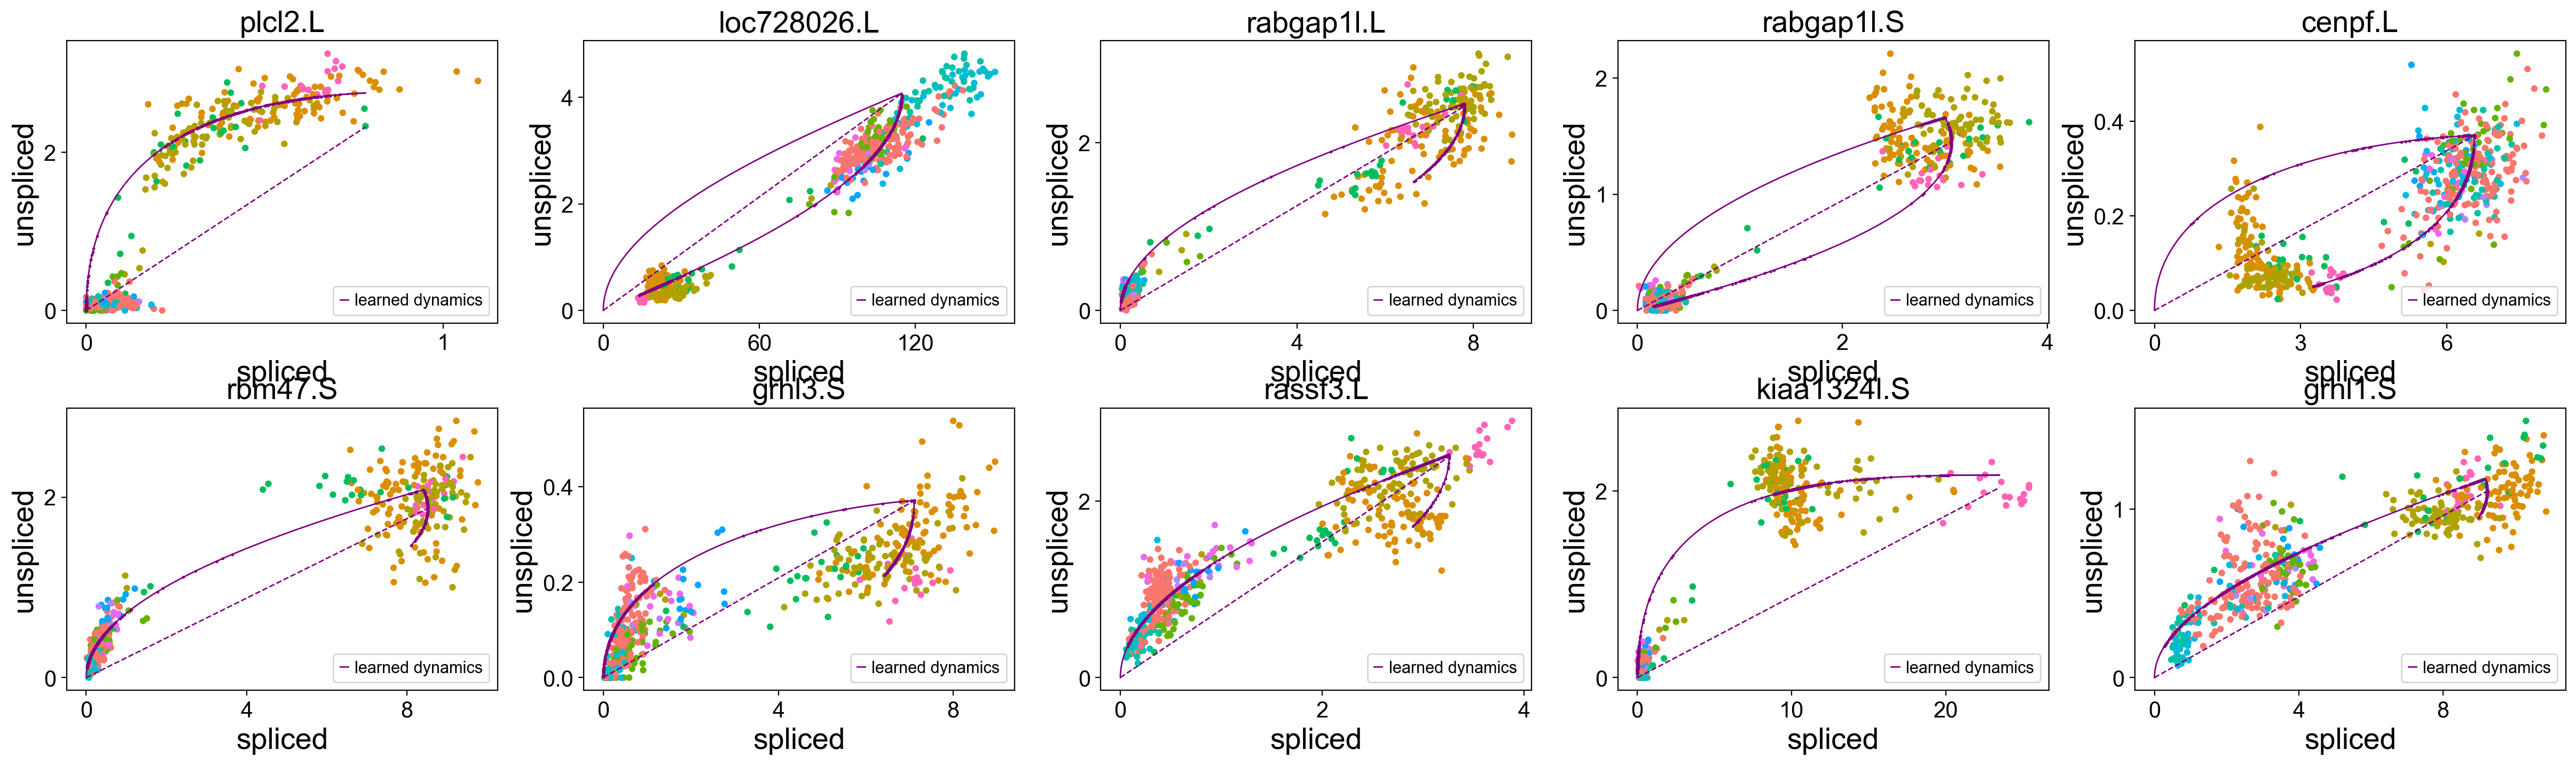

In [17]:
scv.pl.scatter(adata_SIGAB2, basis=top10_SIGAB2, legend_loc='none',color='seurat_clusters',
               size=80, frameon=True, ncols=5, fontsize=20)

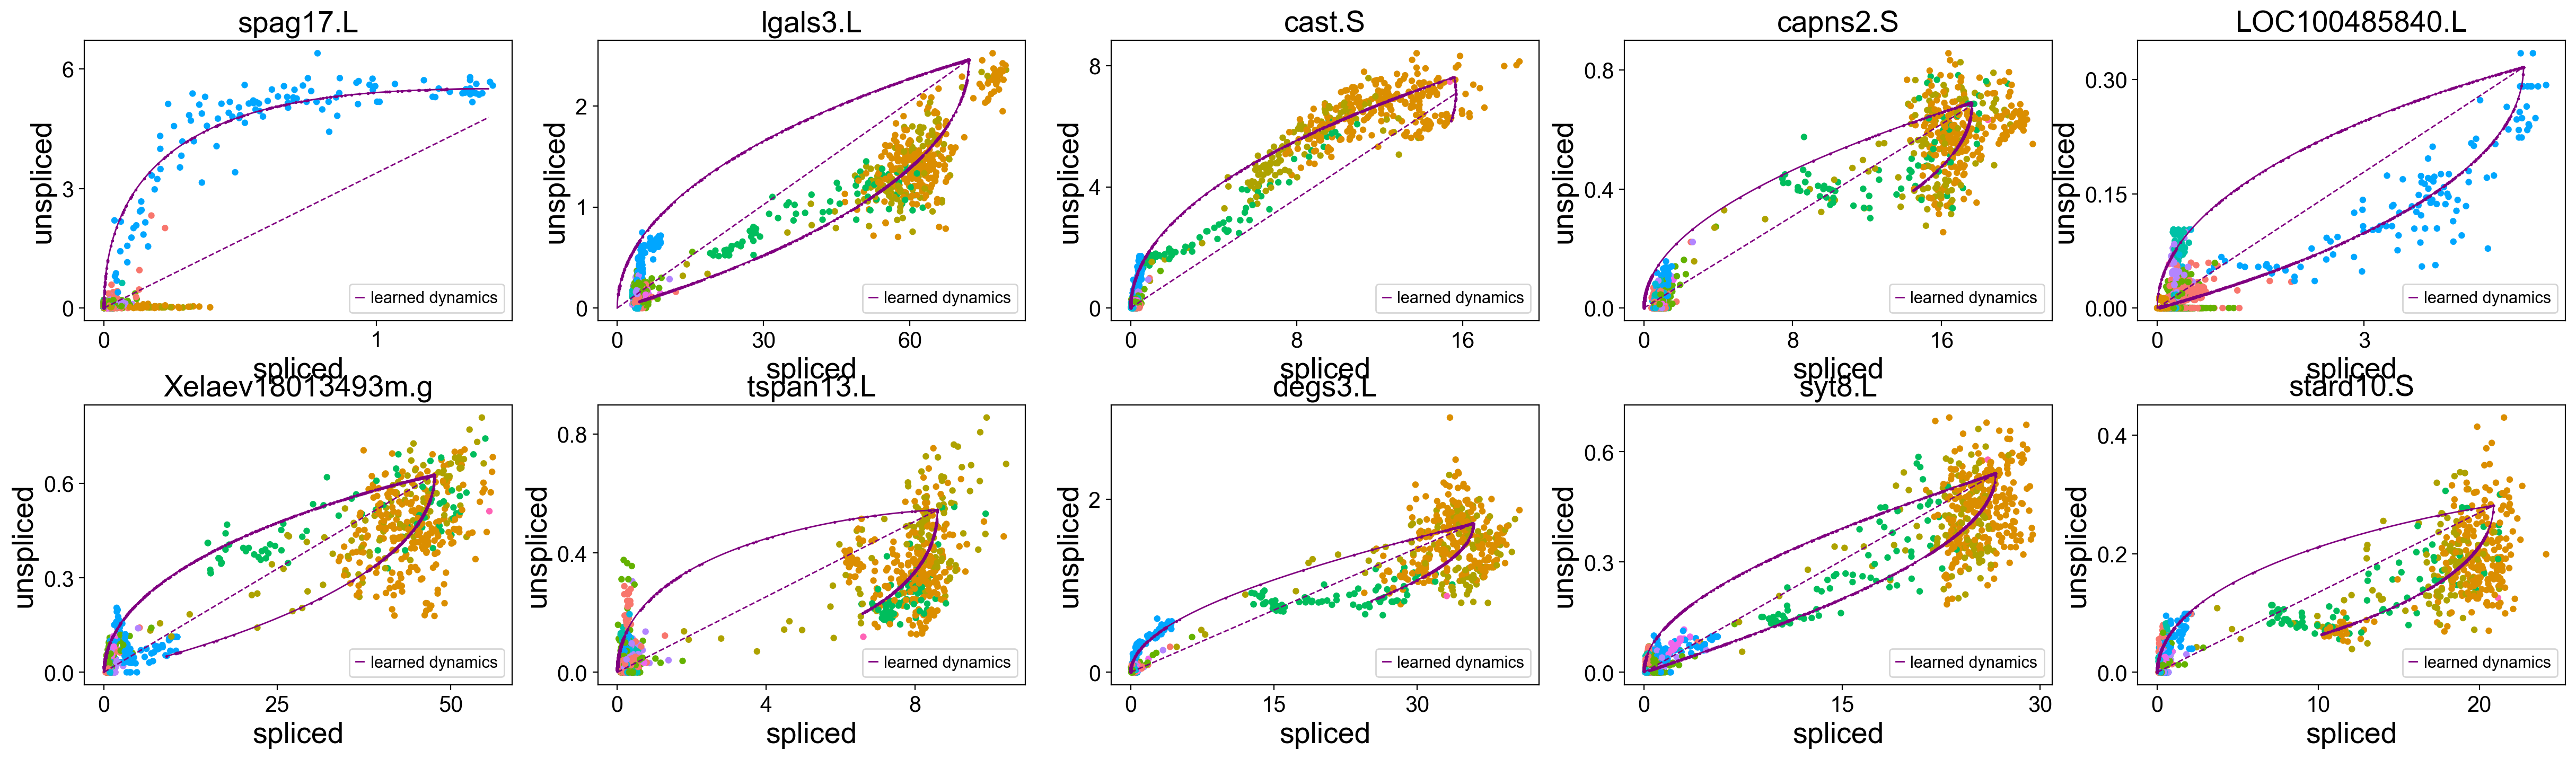

In [18]:
scv.pl.scatter(adata_SIGAH5, basis=top10_SIGAH5, legend_loc='none',color='seurat_clusters',
               size=80, frameon=True, ncols=5, fontsize=20)

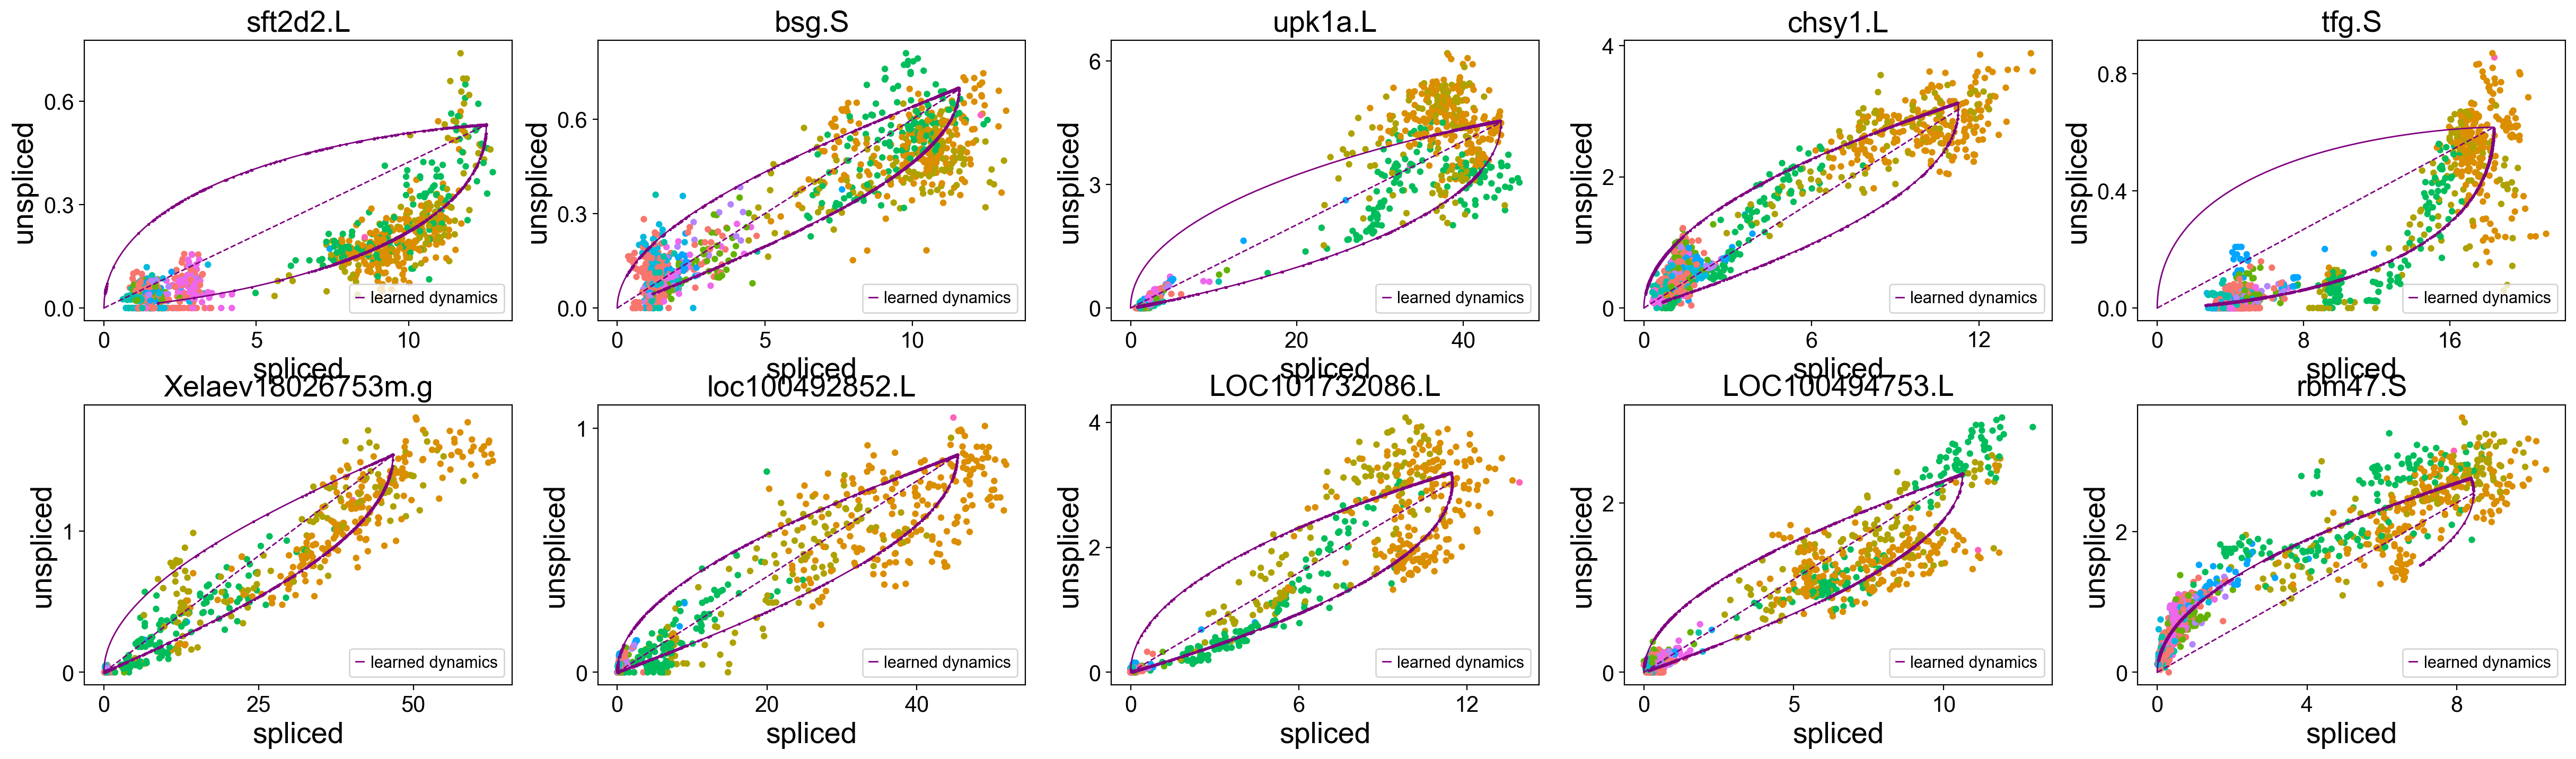

In [19]:
scv.pl.scatter(adata_SIGAH12, basis=top10_SIGAH12, legend_loc='none',color='seurat_clusters',
               size=80, frameon=True, ncols=5, fontsize=20)

In [20]:
print('HVGs intersection')
print('SIGAA2/SIGAH5 (IVF)',len(set(adata_SIGAA2.var_names) & set(adata_SIGAH5.var_names)))
print('SIGAB2/SIGAH12 (NT)',len(set(adata_SIGAB2.var_names) & set(adata_SIGAH12.var_names)))

velo_genes_SIGAA2=list(adata_SIGAA2.var_names[adata_SIGAA2.var['velocity_genes']])
velo_genes_SIGAB2=list(adata_SIGAB2.var_names[adata_SIGAB2.var['velocity_genes']])
velo_genes_SIGAH5=list(adata_SIGAH5.var_names[adata_SIGAH5.var['velocity_genes']])
velo_genes_SIGAH12=list(adata_SIGAH12.var_names[adata_SIGAH12.var['velocity_genes']])

print('Velocity genes intersection')
print('SIGAA2/SIGAH5 (IVF)',len(velo_genes_SIGAA2),len(velo_genes_SIGAH5),
      len(set(velo_genes_SIGAA2) & set(velo_genes_SIGAH5)))

print('SIGAB2/SIGAH12 (NT)',len(velo_genes_SIGAB2),len(velo_genes_SIGAH12),
      len(set(velo_genes_SIGAB2) & set(velo_genes_SIGAH12)))

top300_SIGAA2=adata_SIGAA2.var['fit_likelihood'].sort_values(ascending=False)[:300].index
top300_SIGAB2=adata_SIGAB2.var['fit_likelihood'].sort_values(ascending=False)[:300].index
top300_SIGAH5=adata_SIGAH5.var['fit_likelihood'].sort_values(ascending=False)[:300].index
top300_SIGAH12=adata_SIGAH12.var['fit_likelihood'].sort_values(ascending=False)[:300].index

print('Dynamics genes intersection')
print('SIGAA2/SIGAH5 (IVF)',len(top300_SIGAA2),len(top300_SIGAH5),
      len(set(top300_SIGAA2) & set(top300_SIGAH5)))

print('SIGAB2/SIGAH12 (NT)',len(top300_SIGAB2),len(top300_SIGAH12),
      len(set(top300_SIGAB2) & set(top300_SIGAH12)))

HVGs intersection
SIGAA2/SIGAH5 (IVF) 823
SIGAB2/SIGAH12 (NT) 889
Velocity genes intersection
SIGAA2/SIGAH5 (IVF) 880 1084 365
SIGAB2/SIGAH12 (NT) 891 1028 413
Dynamics genes intersection
SIGAA2/SIGAH5 (IVF) 300 300 116
SIGAB2/SIGAH12 (NT) 300 300 133


In [ ]:
# scv.tl.recover_latent_time(adata_SIGAA2)
# scv.tl.recover_latent_time(adata_SIGAB2)
# scv.tl.recover_latent_time(adata_SIGAH5)
# scv.tl.recover_latent_time(adata_SIGAH12)

# scv.pl.scatter(adata_SIGAA2, color='latent_time', fontsize=24, size=100,
# color_map='gnuplot', colorbar=True, rescale_color=[0,1])
# scv.pl.scatter(adata_SIGAB2, color='latent_time', fontsize=24, size=100,
# color_map='gnuplot', colorbar=True, rescale_color=[0,1])
# scv.pl.scatter(adata_SIGAH5, color='latent_time', fontsize=24, size=100,
# color_map='gnuplot', colorbar=True, rescale_color=[0,1])
# scv.pl.scatter(adata_SIGAH12, color='latent_time', fontsize=24, size=100,
# color_map='gnuplot', colorbar=True, rescale_color=[0,1])


# top_genes_SIGAA2=adata_SIGAA2.var['fit_likelihood'].sort_values(ascending=False).index[:300]
# scv.pl.heatmap(adata_SIGAA2, var_names=top_genes_SIGAA2, tkey='latent_time',
#                n_convolve=None, col_color='seurat_clusters')
# top_genes_SIGAB2=adata_SIGAB2.var['fit_likelihood'].sort_values(ascending=False).index[:300]
# scv.pl.heatmap(adata_SIGAB2, var_names=top_genes_SIGAB2, tkey='latent_time', 
#                n_convolve=None, col_color='seurat_clusters')
# top_genes_SIGAH5=adata_SIGAH5.var['fit_likelihood'].sort_values(ascending=False).index[:300]
# scv.pl.heatmap(adata_SIGAH5, var_names=top_genes_SIGAH5, tkey='latent_time',
#                n_convolve=None, col_color='seurat_clusters')
# top_genes_SIGAH12=adata_SIGAH12.var['fit_likelihood'].sort_values(ascending=False).index[:300]
# scv.pl.heatmap(adata_SIGAH12, var_names=top_genes_SIGAH12, tkey='latent_time', 
#                n_convolve=None, col_color='seurat_clusters')

# Inner and outer layers separately

Trying to set attribute `.obs` of view, copying.


Abundance of ['spliced', 'unspliced']: [0.92 0.08]
Filtered out 18156 genes that are detected in less than 10 cells (spliced).
Filtered out 1458 genes that are detected 20 counts (spliced).
Filtered out 4777 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:00:48) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

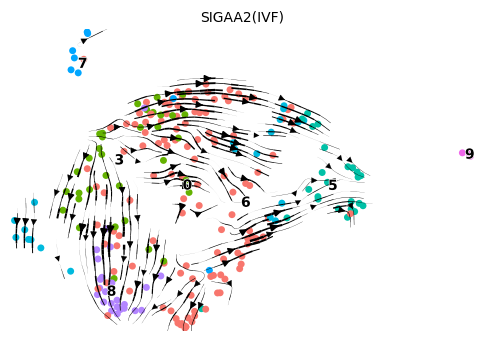

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAA2_inner__grid.pdf


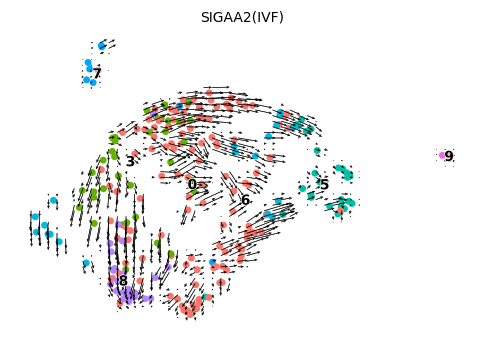

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAA2_inner__PAGA.pdf


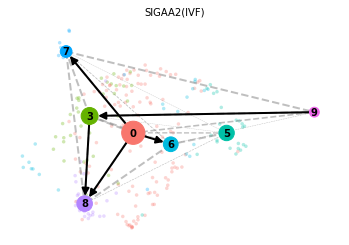

Trying to set attribute `.obs` of view, copying.


Abundance of ['spliced', 'unspliced']: [0.9 0.1]
Filtered out 17500 genes that are detected in less than 10 cells (spliced).
Filtered out 1403 genes that are detected 20 counts (spliced).
Filtered out 4344 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:00:44) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations

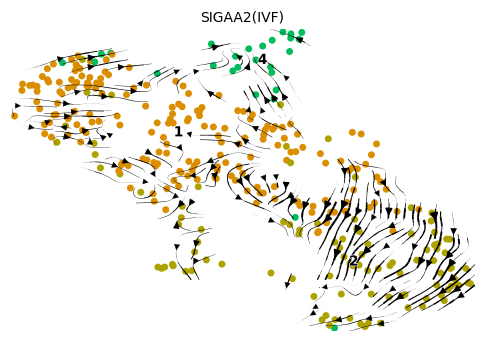

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAA2_outer__grid.pdf


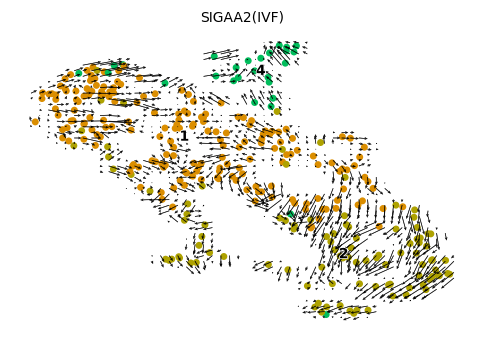

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAA2_outer__PAGA.pdf


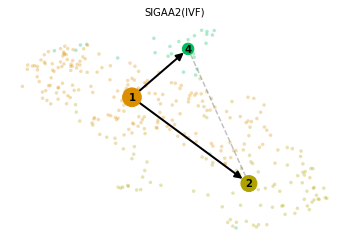

Trying to set attribute `.obs` of view, copying.


Abundance of ['spliced', 'unspliced']: [0.92 0.08]
Filtered out 18101 genes that are detected in less than 10 cells (spliced).
Filtered out 1385 genes that are detected 20 counts (spliced).
Filtered out 4913 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:00:57) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

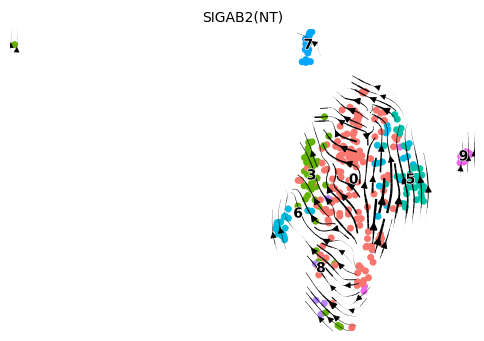

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAB2_inner__grid.pdf


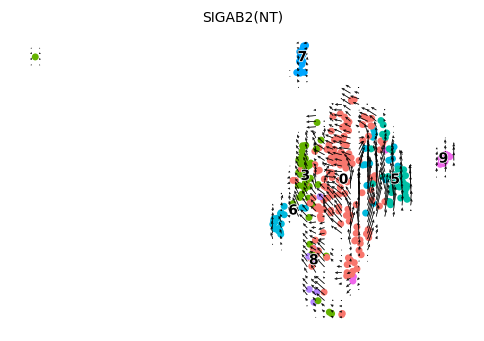

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAB2_inner__PAGA.pdf


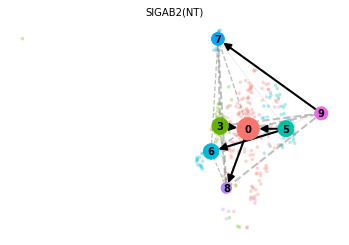

Trying to set attribute `.obs` of view, copying.


Abundance of ['spliced', 'unspliced']: [0.92 0.08]
Filtered out 18121 genes that are detected in less than 10 cells (spliced).
Filtered out 1374 genes that are detected 20 counts (spliced).
Filtered out 5279 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:00:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

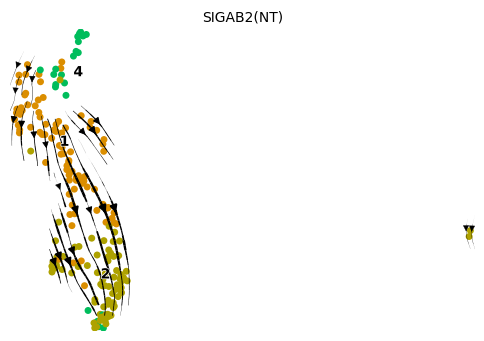

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAB2_outer__grid.pdf


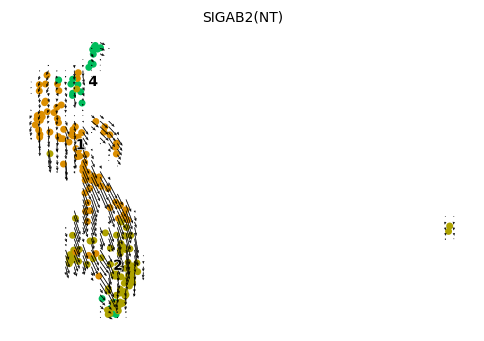

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAB2_outer__PAGA.pdf


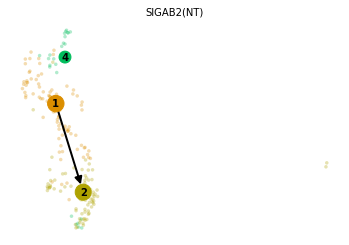

Trying to set attribute `.obs` of view, copying.


Abundance of ['spliced', 'unspliced']: [0.94 0.06]
Filtered out 16084 genes that are detected in less than 10 cells (spliced).
Filtered out 1443 genes that are detected 20 counts (spliced).
Filtered out 3390 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:03:09) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

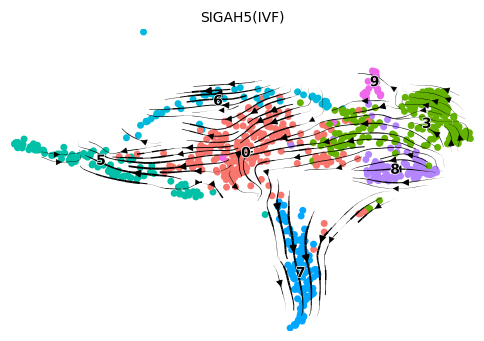

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH5_inner__grid.pdf


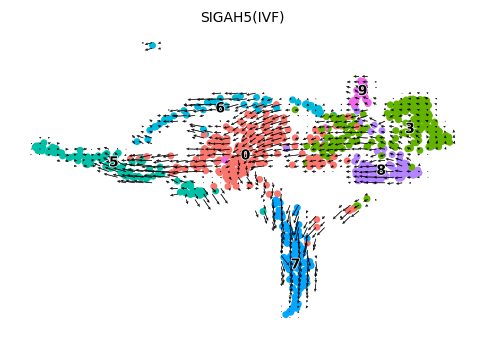

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH5_inner__PAGA.pdf


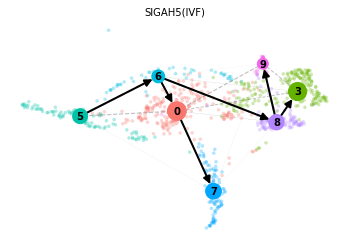

Trying to set attribute `.obs` of view, copying.


Abundance of ['spliced', 'unspliced']: [0.92 0.08]
Filtered out 17414 genes that are detected in less than 10 cells (spliced).
Filtered out 1518 genes that are detected 20 counts (spliced).
Filtered out 3902 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:01:11) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

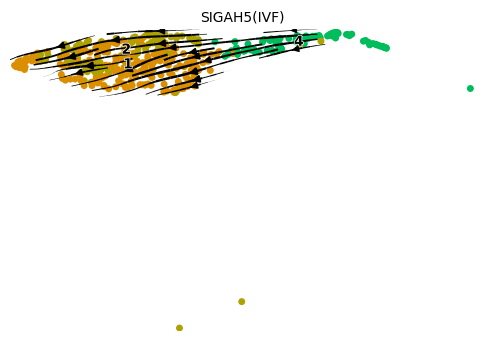

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH5_outer__grid.pdf


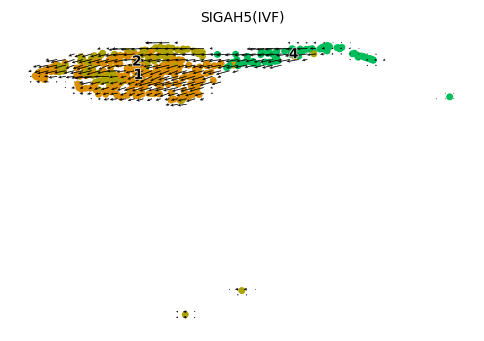

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH5_outer__PAGA.pdf


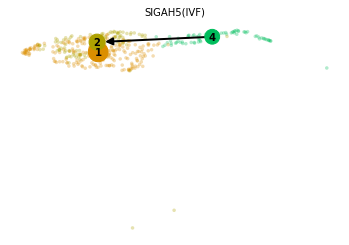

Trying to set attribute `.obs` of view, copying.


Abundance of ['spliced', 'unspliced']: [0.95 0.05]
Filtered out 16658 genes that are detected in less than 10 cells (spliced).
Filtered out 1306 genes that are detected 20 counts (spliced).
Filtered out 4199 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:02:30) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

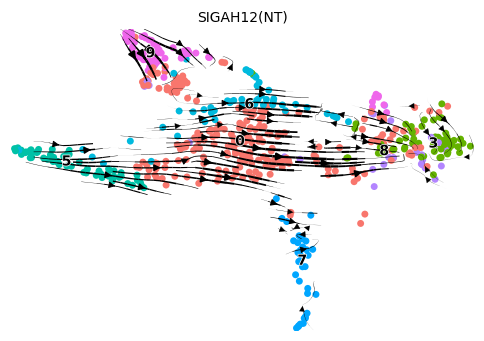

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH12_inner__grid.pdf


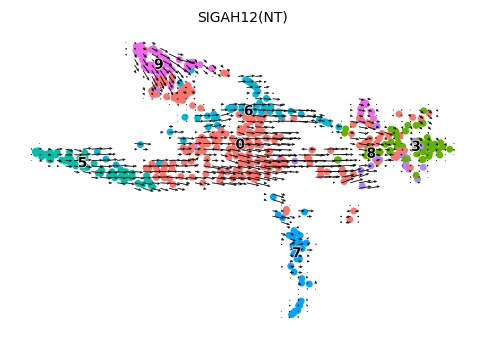

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH12_inner__PAGA.pdf


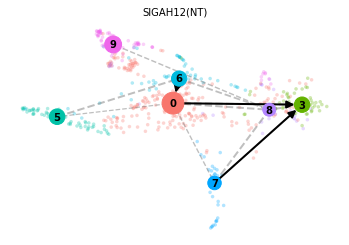

Trying to set attribute `.obs` of view, copying.


Abundance of ['spliced', 'unspliced']: [0.94 0.06]
Filtered out 16693 genes that are detected in less than 10 cells (spliced).
Filtered out 1411 genes that are detected 20 counts (spliced).
Filtered out 3951 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:02:08) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlatio

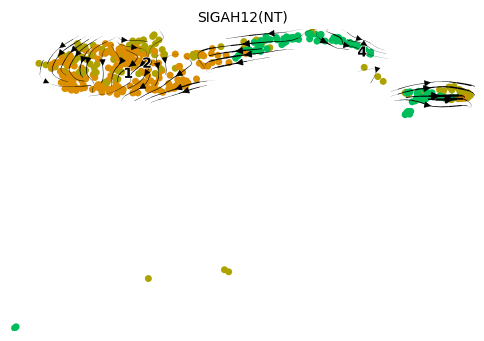

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH12_outer__grid.pdf


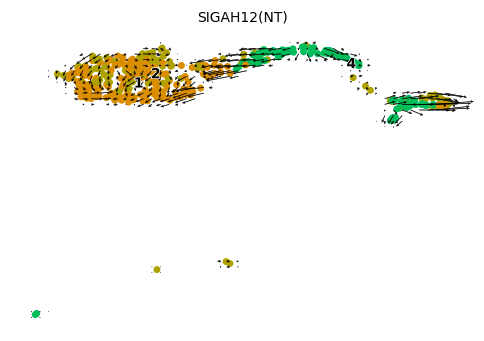

saving figure to file ./figures/scvelo_per_exp_UMAP_SIGAH12_outer__PAGA.pdf


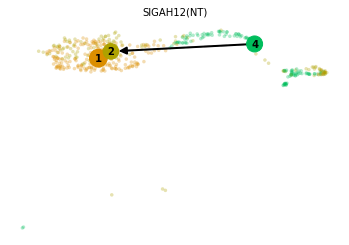

In [16]:
# Run RNA velocity analysis
RNAVeloWrap(adata_SIGAA2_inner,batch='SIGAA2',label='inner',cond='IVF',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAA2_outer,batch='SIGAA2',label='outer',cond='IVF',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAB2_inner,batch='SIGAB2',label='inner',cond='NT',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAB2_outer,batch='SIGAB2',label='outer',cond='NT',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAH5_inner,batch='SIGAH5',label='inner',cond='IVF',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAH5_outer,batch='SIGAH5',label='outer',cond='IVF',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAH12_inner,batch='SIGAH12',label='inner',cond='NT',cl_lab='seurat_clusters',dimred=my_embedding)
RNAVeloWrap(adata_SIGAH12_outer,batch='SIGAH12',label='outer',cond='NT',cl_lab='seurat_clusters',dimred=my_embedding)